## Project-PF: Patient Flow Visualization in Ethiopia

Code: by Geletaw Sahle Tegenaw

### Patient Flow 
#### Defined 
The movement of patients through a healthcare facility from the point of admission to the point of discharge. 
A quality improvement tool which can be used to help identify patient flow inefficiencies at any type of health care facility and inform areas for intervention to help improve care delivery processes.

## Case Study between South-Western Ethiopia Specialized hospital, General Hospitals, Primary Hospitals and Health Centers. The detail is listed as follows 

1. Jimma University Medical Center (Specilized Hospital), 

2. Three General Hospitals: Gambella General Hospital (GH), Agaro General Hospital(GH), 

3. Five Primary Hospitals: Nyinenyang Primary Hospital, Kumi Primary Hospital, Seka Chekorsa Primary Hospital,OmoNada Primary Hospital, Setema Primary Hospital,

4. 12 health centers



### Scope 
Outpatient vs Inpatient 

#### Outpatient  Patient Flow
An individual (patient) who receives healthcare services on an outpatient basis, meaning they do not stay overnight in a hospital or inpatient facility.

#### Inpatient Patient Flow
Refers to someone admitted to the hospital to stay overnight, whether briefly or for an extended period of time.


##### Why patient flow is important? 
1. Reduce the need for regular surge plans.
2. Prevent diversions and overcrowding in ED.
3. Eliminate high wait times and delays for treatments, and admissions to inpatient beds.
4. Improve staff schedules to match demand, while reducing excessive overtime.
5. Increase the number of patients admitted to the appropriate inpatient unit based on a patient’s clinical condition.
6. Utilize case management strategies to reduce the length of stay for outliers.
7. Improve discharge and bed capacity management planning.


##### Challenges 
1. Inefficiencies in the patient visit and efficiently collect patient flow data.
2. A mismatch between staffing ratios and service demand leads to overcrowding of patients in waiting rooms of health centers. 

#### Proposed Solution 
1. Designing real-time patient flow data-driven dashboard in Ethiopia
2. Perform analysis analysis and prediction e.g. Time Series 
3. Patient load prediction model for forecasting future patient loads 
4. Re-assigning surplus patient loads to adjacent facilities with low load as a means of controlling congestion and reducing the number of patients who leave health facilities without obtaining medical care as a result of overcrowding
5. Automatic matching of patient flow with diseases based on disease registration 

In [2]:
!pip install -U -q PyDrive

In [3]:
from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive

from google.colab import auth

from oauth2client.client import GoogleCredentials


In [4]:
auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

In [5]:
#https://drive.google.com/file/d/1MJjqhqGN2dYD4p6RcppAsNZCTxkKjIZu/view?usp=sharing

In [6]:
fileDownloaded = drive.CreateFile({'id':'1MJjqhqGN2dYD4p6RcppAsNZCTxkKjIZu'})

# https://drive.google.com/file/d/1yGg6xtwhvD5WW2sllJZoAI4TwnfLM_6d/view?usp=sharing
fileDownloaded1 = drive.CreateFile({'id':'1yGg6xtwhvD5WW2sllJZoAI4TwnfLM_6d'})

# https://drive.google.com/file/d/1iDuFiJPPdRQwTuIxjNckUY0UksxAi7vj/view?usp=sharing
op =  drive.CreateFile({'id':'1iDuFiJPPdRQwTuIxjNckUY0UksxAi7vj'})

# https://drive.google.com/file/d/1Jj6uo6zF5ASC9yQ5TgqG3ujcE6BAacSV/view?usp=sharing
inop = drive.CreateFile({'id':'1Jj6uo6zF5ASC9yQ5TgqG3ujcE6BAacSV'})

# version updated
# https://drive.google.com/file/d/1tnSGMTzIxjcufjiqOhRyUp4I3IaRGQzX/view?usp=sharing
inop1 = drive.CreateFile({'id':'1tnSGMTzIxjcufjiqOhRyUp4I3IaRGQzX'})


#detials version 
#https://drive.google.com/file/d/103LRVbp0-cedPlM24S4Xc38z-dI1AFQV/view?usp=sharing
inopdetail = drive.CreateFile({'id':'103LRVbp0-cedPlM24S4Xc38z-dI1AFQV'})



In [7]:
fileDownloaded.GetContentFile('PH_Proccessed_OPIP_DS.csv')

fileDownloaded1.GetContentFile('All_Proccessed_OPIP_DS_TotalOnly.csv')

op.GetContentFile('Outpatient.csv')
inop.GetContentFile('IOOP_Total.csv')
inop1.GetContentFile('IOOP_Total_v2.csv')
inopdetail.GetContentFile('IOOP_Total_detail.csv')

Install pysankey

In [8]:
!pip install pysankey

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import libraries 

In [9]:
import pandas as pd
import plotly.graph_objects as go

# Import the sankey function from the sankey module within pySankey
from pySankey.sankey import sankey

import matplotlib.pyplot as plt

import numpy as np

Import datasets

In [10]:
opdf = pd.read_csv('Outpatient.csv' )

inopdf = pd.read_csv('IOOP_Total.csv')

inopdf1 = pd.read_csv('IOOP_Total_v2.csv')
inopdetail= pd.read_csv('IOOP_Total_detail.csv')

Check dataset size and shape

In [11]:
print("Outpatient", opdf.shape,"  ....." ,"All outpatient and inpatient", inopdf.shape)

Outpatient (266, 5)   ..... All outpatient and inpatient (21, 13)


Outpatient dataset

In [12]:
opdf.head()

,Category,Name,Age Group,Gender,Outpatient_visits
0,SH,JUSH,<5,Male,24918
1,SH,JUSH,<5,Female,27264
2,SH,JUSH,5-10,Male,18922
3,SH,JUSH,5-10,Female,21438
4,SH,JUSH,11-19,Male,43217


In [13]:
opdf.columns

Index(['Category ', 'Name', 'Age Group', 'Gender', 'Outpatient_visits'], dtype='object')

All inpatient and outpatient dataset

In [14]:
inopdf.head()

,Category,Source,Name,Referral_in_from,Referral_out_to,Outpatient visits,inpatient_admissions,Admission_rate,Bed_occupancy_rate,Length_of_stay_reportingPeriod_in_days,total_numberof_beds,Number_of_inpatient_discharges,Total_lengthof stay_indays_during_discharge
0,SH,GH,JUSH,GH,SH,668939,57905.0,7.9700%,"1,690.5",326260,26234,76715,183150
1,GH,PH,Gambella GH,PH,SH,232108,17891.0,7.1600%,"1,644.6",87294,6972,13147,35727
2,GH,PH,Agaro GH,PH,SH,239972,12707.0,5.0300%,2571,58420,3096,11976,42047
3,GH,PH,Shenan Gibe GH,PH,SH,260055,6027.0,2.2700%,"1,476.3",30198,1494,6906,12756
4,PH,HC,Omo Nada PH,HC,GH,107351,6065.0,5.3500%,"1,640.5",25835,2139,5117,18960


In [15]:
inopdf.columns

Index(['Category ', 'Source', 'Name', 'Referral_in_from', 'Referral_out_to',
       'Outpatient visits', 'inpatient_admissions', 'Admission_rate',
       'Bed_occupancy_rate', 'Length_of_stay_reportingPeriod_in_days',
       'total_numberof_beds', 'Number_of_inpatient_discharges',
       'Total_lengthof stay_indays_during_discharge'],
      dtype='object')

Import and define label encoding

In [16]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()


A function to generate Sankey Diagram

In [17]:
def genSnakey(source, target, value, label):
  fig = go.Figure(data=[go.Sankey(
      node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "red", width = 0.5),
        label = label,
        color = ["red", "dodgerblue", "black", "gold", "orange" ],
        #label = df['Visit_Type'],
        #color = "blue"
      
      ),
      link = dict(
        source = source,
        target = target,
        value = value,
        color = "gold",
        # Color of the links
    ))])

  fig.update_layout(title_text="Patient flow", font_size=10)
  fig.show()

Set the source and the target for plotting Sankey diagram for outptient flow

In [18]:
opdf.head(2)

,Category,Name,Age Group,Gender,Outpatient_visits
0,SH,JUSH,<5,Male,24918
1,SH,JUSH,<5,Female,27264


In [19]:
# Encode labels in column 'species'.
opdf['Source']= label_encoder.fit_transform(opdf['Category '])
opdf['Target']= label_encoder.fit_transform(opdf['Gender'])
label = ['SH', 'GH', 'PH', 'HC']

In [20]:
opdf.head(2)

,Category,Name,Age Group,Gender,Outpatient_visits,Source,Target
0,SH,JUSH,<5,Male,24918,3,1
1,SH,JUSH,<5,Female,27264,3,0


In [21]:
opdf['Category '].unique()

array(['SH', 'GH', 'PH', 'HC'], dtype=object)

Call the function and generate sankey diagarm

In [22]:
opdf.head()

,Category,Name,Age Group,Gender,Outpatient_visits,Source,Target
0,SH,JUSH,<5,Male,24918,3,1
1,SH,JUSH,<5,Female,27264,3,0
2,SH,JUSH,5-10,Male,18922,3,1
3,SH,JUSH,5-10,Female,21438,3,0
4,SH,JUSH,11-19,Male,43217,3,1


Patient Flow Visualization Gender and health facility category

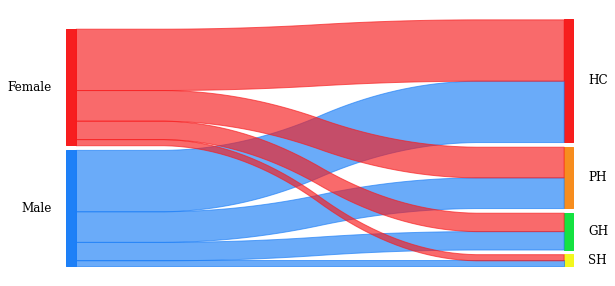

In [25]:
colors = {
    "Male": "#1b7ef7",
    "Female": "#f71b1c",
    "HC": "#f71b1b",
    "SH": "#f3f71b",
    "GH": "#12e23f",
    "PH": "#f78c1b"
}

sankey(opdf["Gender"], opdf["Category "], aspect=20, colorDict=colors, fontsize=12)
# Get current figure
fig = plt.gcf()

# Set size in inches
fig.set_size_inches(10, 5)

# Set the color of the background to white
fig.set_facecolor("w")

In [26]:
opdf['Name'].unique()

array(['JUSH', 'Gambella GH', 'Agaro GH', 'Shenan Gibe GH', 'Omo Nada PH',
       'Setema PH', 'Seka Chekorsa PH', 'Nyinenyang PH', 'Kumi PH',
       'Asendabo HC', 'Dato Karsu HC', 'Gesecha HC', 'Geta Bake HC',
       'Gier HC', 'Jimma HC', 'Jimma Higher Two', 'Koatgar HC',
       'Metti HC', 'Yela Sesacha HC'], dtype=object)

Patient Flow Visualization by gender and detail with each facilities

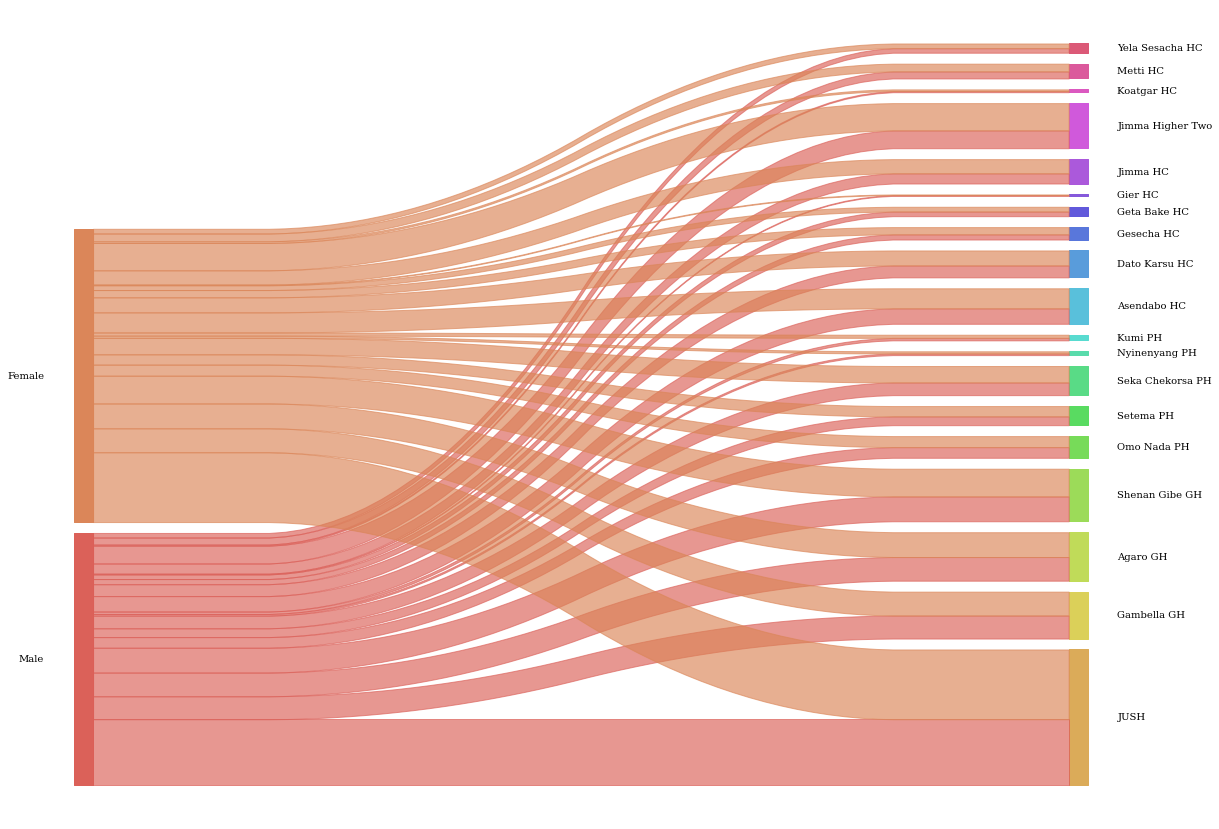

In [ ]:
sankey(
    left=opdf["Gender"], right=opdf["Name"], 
    leftWeight= opdf["Outpatient_visits"], rightWeight=opdf["Outpatient_visits"], 
    aspect=20, fontsize=10
)

# Get current figure
fig = plt.gcf()

# Set size in inches
fig.set_size_inches(20, 15)

# Set the color of the background to white
fig.set_facecolor("w")

Patient Flow Visualization by Age Groups  under each facilities 

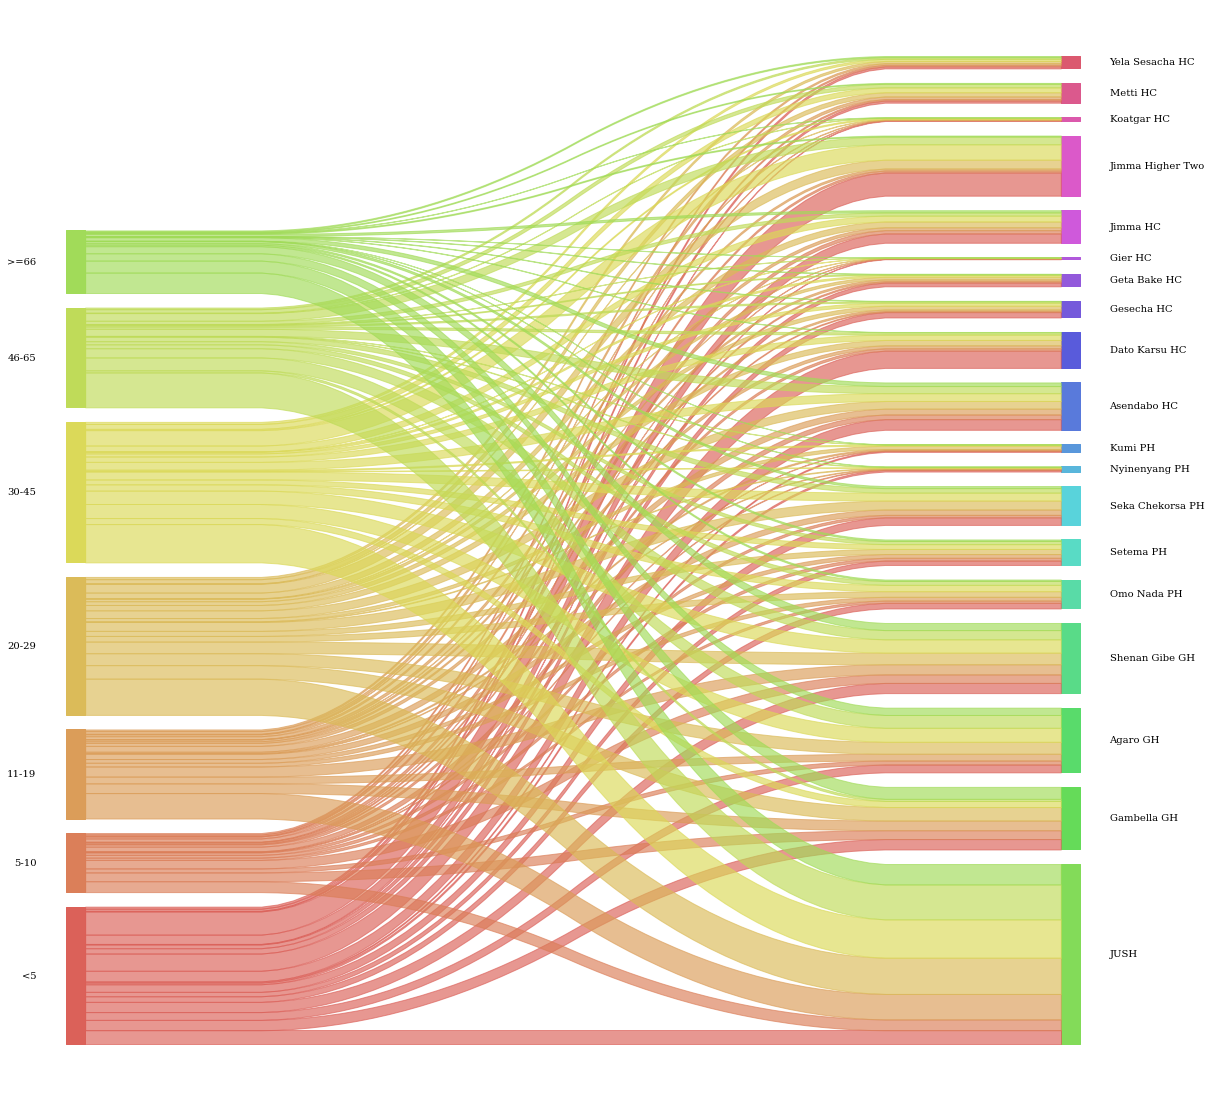

In [ ]:
sankey(
    left=opdf["Age Group"], right=opdf["Name"], 
    leftWeight= opdf["Outpatient_visits"], rightWeight=opdf["Outpatient_visits"], 
    aspect=20, fontsize=10
)

# Get current figure
fig = plt.gcf()

# Set size in inches
fig.set_size_inches(20, 20)

# Set the color of the background to white
fig.set_facecolor("w")

Patient Flow Visualization by Age group and Genderal

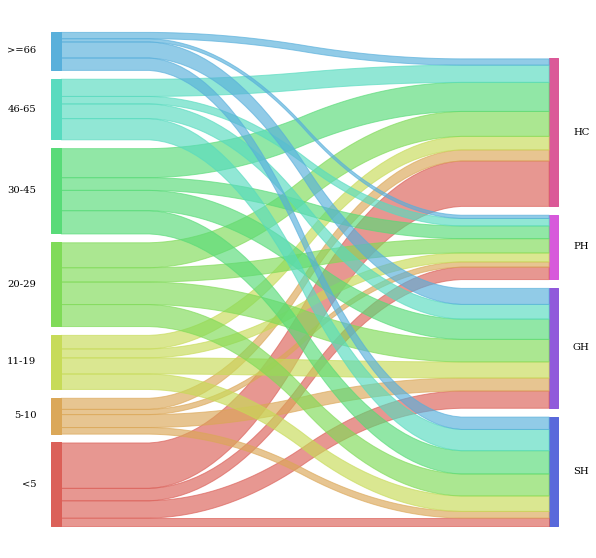

In [ ]:
sankey(
    left=opdf["Age Group"], right=opdf["Category "], 
    leftWeight= opdf["Outpatient_visits"], rightWeight=opdf["Outpatient_visits"], 
    aspect=20, fontsize=10
)


# Get current figure
fig = plt.gcf()

# Set size in inches
fig.set_size_inches(10, 10)

# Set the color of the background to white
fig.set_facecolor("w")

## Patient flow  visualization based on outpatient visit, inpatient visit, admissin rate and length of stay 

#### Details version

In [34]:
inopdetail.head()

,Referral_in_Sources,Current_Target,Referral_out_to,Outpatient visits,inpatient_admissions,Admission_rate,Bed_occupancy_rate,Length_of_stay_reportingPeriod_in_days,total_numberof_beds,Number_of_inpatient_discharges,Total_lengthof stay_indays_during_discharge
0,Gambella GH,JUSH,SH,83617,7238.0,7.97,211,40783,3279,9589,22894
1,Agaro GH,JUSH,SH,83617,7238.0,7.97,211,40783,3279,9589,22894
2,Shenan Gibe GH,JUSH,SH,83617,7238.0,7.97,211,40783,3279,9589,22894
3,Nyinenyang PH,Gambella GH,JUSH,58027,4473.0,7.16,411,21824,1743,3287,8932
4,Kumi PH,Gambella GH,JUSH,58027,4473.0,7.16,411,21824,1743,3287,8932


In [33]:
#inopdetail['Admission_rate'] = (inopdetail['Admission_rate'].str[:-1].astype(float))
inopdetail.head(2)

,Referral_in_Sources,Current_Target,Referral_out_to,Outpatient visits,inpatient_admissions,Admission_rate,Bed_occupancy_rate,Length_of_stay_reportingPeriod_in_days,total_numberof_beds,Number_of_inpatient_discharges,Total_lengthof stay_indays_during_discharge
0,Gambella GH,JUSH,SH,83617,7238.0,7.97,211,40783,3279,9589,22894
1,Agaro GH,JUSH,SH,83617,7238.0,7.97,211,40783,3279,9589,22894


### A function to generate patient flow usign Sankey diagram

In [36]:
def generate_sankey(source, target, value, title):
    nodes = np.unique(inopdetail[[source,target]], axis=None)
    nodes = pd.Series(index=nodes, data=range(len(nodes)))

    color_node = ['#EBBAB5', 
    '#EBBAB5', '#FEF3C7', '#A6E3D7','#98FB98', '#DDA0DD','#EBBAB5', '#FEF3C7', '#A6E3D7','#98FB98', '#DDA0DD','#EBBAB5', '#FEF3C7', '#A6E3D7','#98FB98', '#DDA0DD','#EBBAB5', '#FEF3C7', '#A6E3D7','#98FB98', '#DDA0DD','#EBBAB5', '#FEF3C7', '#A6E3D7','#98FB98', '#DDA0DD']
    color_link = ['#EBBAB5', '#FEF3C7', '#A6E3D7','#98FB98', '#DDA0DD', 
    '#EBBAB5', '#FEF3C7', '#A6E3D7','#98FB98', '#DDA0DD','#EBBAB5', '#FEF3C7', '#A6E3D7','#98FB98', '#DDA0DD','#EBBAB5', '#FEF3C7', '#A6E3D7','#98FB98', '#DDA0DD','#EBBAB5', '#FEF3C7', '#A6E3D7','#98FB98', '#DDA0DD','#EBBAB5', '#FEF3C7', '#A6E3D7','#98FB98', '#DDA0DD']


    fig = go.Figure(
        go.Sankey(
            node={"label": nodes.index,
                  # 'color': color_node,
                  },
            link={
                "source": nodes.loc[inopdetail[source]],
                "target": nodes.loc[inopdetail[target]],
                "value": inopdetail[value],
                'color': color_link,
            },
        )
    )
    fig.update_layout(title_text=title, font_size=10, height=700)

    fig.add_annotation(dict(font=dict(color="black",size=12), x=0.25, y=1.06, showarrow=False, text='<b>HC</b>'))
    fig.add_annotation(dict(font=dict(color="black",size=12), x=0.5, y=1.06, showarrow=False, text='<b>PH</b>'))
    fig.add_annotation(dict(font=dict(color="black",size=12), x=0.75, y=1.06, showarrow=False, text='<b>GH</b>'))
    fig.add_annotation(dict(font=dict(color="black",size=12), x=1, y=1.06, showarrow=False, text='<b>SH</b>'))


    fig.show()


### Patient Flow Visualization based on admission rate

In [37]:
generate_sankey("Referral_in_Sources", "Current_Target", "Admission_rate", "Admission rate")

### Patient Flow Visualization based inpatient flow

In [38]:
generate_sankey("Referral_in_Sources", "Current_Target", "inpatient_admissions", "Inpatient flow")

### Patient Flow Visualization based on outpatient flow

In [39]:
generate_sankey("Referral_in_Sources", "Current_Target", "Outpatient visits", "Outpatient flow")

### Patient Flow Visualization based on Length of stay

In [40]:
generate_sankey("Referral_in_Sources", "Current_Target", "Total_lengthof stay_indays_during_discharge", "Total_lengthof stay_indays_during_discharge")